In [78]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

df = pd.read_csv("Aemf1.csv")
df[:10]

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2,False,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4,False,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2,False,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4,False,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2,True,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
5,Amsterdam,552.808567,Weekday,Private room,False,True,3,False,0,0,8,100,2,2.131420,1.904668,174.788957,9.255191,225.201662,15.692376
6,Amsterdam,215.124317,Weekday,Private room,False,True,2,False,0,0,10,94,1,1.881092,0.729747,200.167652,10.599010,242.765524,16.916251
7,Amsterdam,2771.307384,Weekday,Entire home/apt,False,False,4,True,0,0,10,100,3,1.686807,1.458404,208.808109,11.056528,272.313823,18.975219
8,Amsterdam,1001.804420,Weekday,Entire home/apt,False,False,4,False,0,0,9,96,2,3.719141,1.196112,106.226456,5.624761,133.876202,9.328686
9,Amsterdam,276.521454,Weekday,Private room,False,True,2,False,1,0,10,88,1,3.142361,0.924404,206.252861,10.921226,238.291258,16.604478


In [41]:
df['City'].value_counts()

Rome         9027
Paris        6688
Lisbon       5763
Athens       5280
Budapest     4022
Vienna       3537
Barcelona    2833
Berlin       2484
Amsterdam    2080
Name: City, dtype: int64

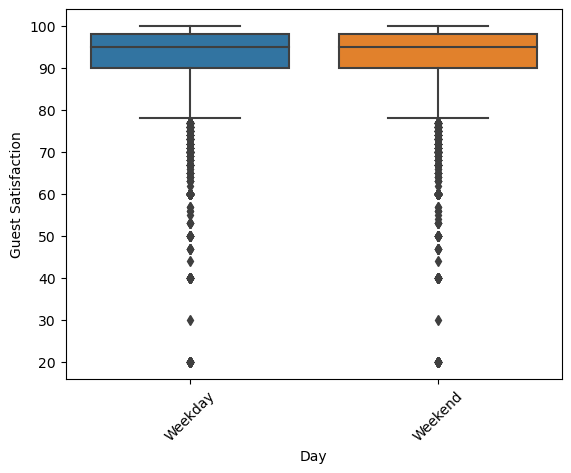

In [42]:
sns.boxplot(x = df['Day'],
            y = df['Guest Satisfaction'])
plt.xticks(rotation=45)
plt.show()
#amsterdam has the least number of entries but the highest median prices

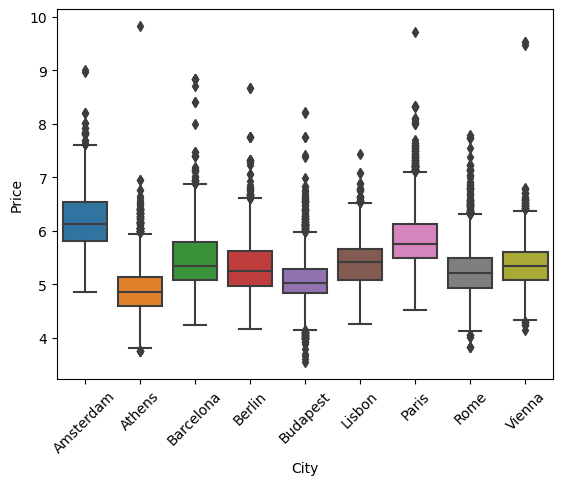

In [43]:
sns.boxplot(x = df['City'],
            y = np.log(df['Price']))
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Guest Satisfaction vs cleanliness rating')

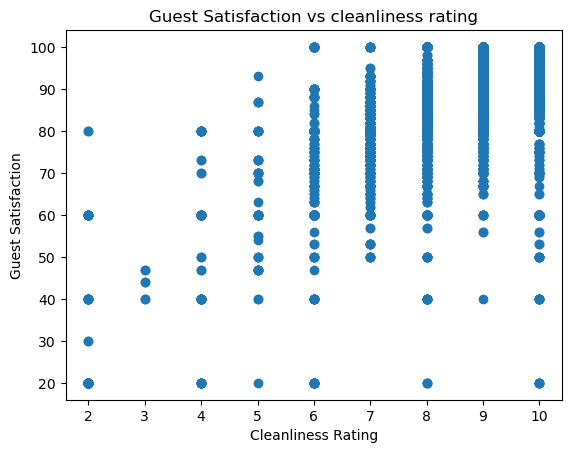

In [44]:
plt.scatter(df['Cleanliness Rating'], df['Guest Satisfaction'])
plt.xlabel("Cleanliness Rating")
plt.ylabel("Guest Satisfaction")
plt.title("Guest Satisfaction vs cleanliness rating")

In [58]:
X = df.drop(['Guest Satisfaction','Private Room', 'Shared Room','Normalised Attraction Index','Normalised Restraunt Index'], axis=1)
X['Superhost']=X['Superhost'].astype(int)
Y = df['Guest Satisfaction']

one_hot_encoded = pd.get_dummies(X['City'])
X = pd.concat([X, one_hot_encoded], axis=1)

one_hot_encoded = pd.get_dummies(X['Room Type'])
X = pd.concat([X, one_hot_encoded], axis=1)

X['Day'] = X['Day'].map({'Weekday': 1, 'Weekend': 0})

X = X.drop(['City','Room Type','Vienna','Entire home/apt'], axis=1)

scaler = StandardScaler()
X['Cleanliness Rating'] = scaler.fit_transform(X[['Cleanliness Rating']])
X['City Center (km)'] = scaler.fit_transform(X[['City Center (km)']])
X['Metro Distance (km)'] = scaler.fit_transform(X[['Metro Distance (km)']])
X['Attraction Index'] = scaler.fit_transform(X[['Attraction Index']])
X['Restraunt Index'] = scaler.fit_transform(X[['Restraunt Index']])

print(X[:1])
print(X.columns)

        Price  Day  Person Capacity  Superhost  Multiple Rooms  Business  \
0  194.033698    1                2          0               1         0   

   Cleanliness Rating  Bedrooms  City Center (km)  Metro Distance (km)  ...  \
0            0.627249         1          1.173545             2.740676  ...   

   Amsterdam  Athens  Barcelona  Berlin  Budapest  Lisbon  Paris  Rome  \
0          1       0          0       0         0       0      0     0   

   Private room  Shared room  
0             1            0  

[1 rows x 22 columns]
Index(['Price', 'Day', 'Person Capacity', 'Superhost', 'Multiple Rooms',
       'Business', 'Cleanliness Rating', 'Bedrooms', 'City Center (km)',
       'Metro Distance (km)', 'Attraction Index', 'Restraunt Index',
       'Amsterdam', 'Athens', 'Barcelona', 'Berlin', 'Budapest', 'Lisbon',
       'Paris', 'Rome', 'Private room', 'Shared room'],
      dtype='object')


In [59]:
def linearRegression(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
    linear_model = LinearRegression()
    linear_model.fit(X_train, Y_train)
    Y_pred = linear_model.predict(X_test)
    
    X_train = sm.add_constant(X_train)
    model_sm = sm.OLS(Y_train, X_train).fit()
    t_values=model_sm.tvalues
    print(model_sm.summary())
    return Y_pred, Y_test, t_values

Y_pred, Y_test, t_values = linearRegression(X,Y)
print(Y_test.max(),Y_test.min())
print(np.min(Y_pred),np.max(Y_pred))
rmse_lm = math.sqrt(mean_squared_error(Y_test, Y_pred))
print("Linear Regression's before dropping variables RMSE:", rmse_lm)

                            OLS Regression Results                            
Dep. Variable:     Guest Satisfaction   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     1358.
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        15:37:43   Log-Likelihood:                -92320.
No. Observations:               29199   AIC:                         1.847e+05
Df Residuals:                   29176   BIC:                         1.849e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  93.7775    

In [63]:
def linearRegression(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    linear_model = LinearRegression()
    linear_model.fit(X_train, Y_train)
    Y_pred = linear_model.predict(X_test)
    
    X_train = sm.add_constant(X_train)
    model_sm = sm.OLS(Y_train, X_train).fit()
    t_values=model_sm.tvalues
    print(model_sm.summary())
    return Y_pred, Y_test, t_values

Y_bin = pd.cut(Y,[19, 36, 52, 68, 84,101],labels=[0,1,2,3,4]).astype(int)
Y_pred, Y_test, t_values = linearRegression(X,Y_bin)
Y_pred_bin = pd.cut(Y_pred,[0,1,2,3,4,5],labels=[0,1,2,3,4]).astype(int)
print(np.unique(Y_pred_bin))

accuracy = accuracy_score(Y_test, Y_pred_bin)
print(f"Accuracy: {accuracy}")

                            OLS Regression Results                            
Dep. Variable:     Guest Satisfaction   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     836.5
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        15:38:16   Log-Likelihood:                -10850.
No. Observations:               33371   AIC:                         2.175e+04
Df Residuals:                   33348   BIC:                         2.194e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.9100    

In [96]:
correct=Y_test==Y_pred_bin
Y_test_n=Y_test.tolist()
very_low=[]
low=[]
medium=[]
high=[]
very_high=[]
def calculate_percent(data_array):
    total_elements = len(data_array)
    print("total elements", total_elements)
    correct_count = sum(1 for item in data_array if item == 'Correct')
    percentage_correct = (correct_count / total_elements) * 100
    return percentage_correct

for i in range(len(Y_test)):
    if(correct.iloc[i]==True):
        if(Y_test_n[i]==0):
           very_low.append("Correct") 
        elif(Y_test_n[i]==1):
           low.append("Correct") 
        elif(Y_test_n[i]==2):
            medium.append("Correct")
        elif(Y_test_n[i]==3):
            high.append("Correct")
        elif(Y_test_n[i]==4):
            very_high.append("Correct")
    else:
        if(Y_test_n[i]==0):
           very_low.append("Wrong") 
        elif(Y_test_n[i]==1):
           low.append("Wrong") 
        elif(Y_test_n[i]==2):
            medium.append("Wrong")
        elif(Y_test_n[i]==3):
            high.append("Wrong")
        elif(Y_test_n[i]==4):
            very_high.append("Wrong")
print("very_low:", calculate_percent(very_low))
print("low:", calculate_percent(low))
print("medium:", calculate_percent(medium))
print("high:", calculate_percent(high))
print("very_high:", calculate_percent(very_high))


total elements 18
very_low: 0.0
total elements 18
low: 16.666666666666664
total elements 114
medium: 30.701754385964914
total elements 770
high: 85.84415584415585
total elements 7423
very_high: 48.36319547352822


In [84]:
report = classification_report(Y_test, Y_pred_bin)
print(report)
class_labels = ['Extremely Low', 'Low', 'Medium', 'High', 'Extremely High']
conf_matrix = confusion_matrix(Y_test, Y_pred_bin)
print(pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.18      0.17      0.17        18
           2       0.37      0.31      0.34       114
           3       0.15      0.86      0.25       770
           4       0.98      0.48      0.65      7423

    accuracy                           0.51      8343
   macro avg       0.33      0.36      0.28      8343
weighted avg       0.89      0.51      0.60      8343

                Extremely Low  Low  Medium  High  Extremely High
Extremely Low               0    9       7     1               1
Low                         0    3      13     2               0
Medium                      0    5      35    64              10
High                        0    0      36   661              73
Extremely High              0    0       3  3830            3590


/Users/rachana/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rachana/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rachana/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0, 0.5, 'Importance')

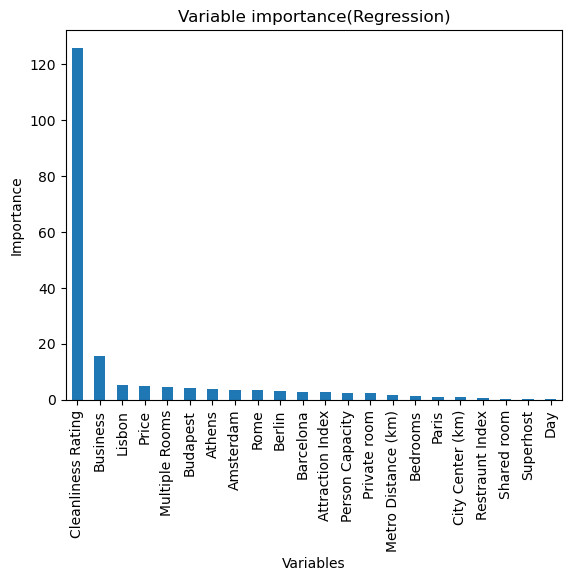

In [49]:
graph=t_values[1:].abs().sort_values(ascending=False)
graph.plot(kind='bar')
plt.title('Variable importance(Regression)')
plt.xlabel('Variables')
plt.ylabel('Importance')

In [95]:
report_prev = classification_report(Y_test,Y_pred_bin,output_dict=True)
report = pd.DataFrame(report_prev)
print(report['0'])
new=pd.DataFrame()
new['low'] = report['0']*sum(Y_test==0)[0]
report['1'] = report['1']*sum(Y_test==1)[0]
report['2'] = report['2']*sum(Y_test==2)[0]
report['3'] = report['3']*sum(Y_test==3)[0]
report['4'] = report['4']*sum(Y_test==4)[0]
#print(report)
resumen=[]
'''
resumen.loc[nresumen,'rec_mal'] = report.loc['recall'][['0.0', '1.0', '2.0']].sum()/sum(Y_test<=2)[0]
resumen.loc[nresumen,'rec_bien'] = report.loc['recall'][['3.0', '4.0']].sum()/sum(Y_test>2)[0]
resumen.loc[nresumen,'rec_tot'] = report.loc['recall'][['0.0', '1.0', '2.0','3.0', '4.0']].sum()/len(y_test)
resumen.loc[nresumen,'acc_mal'] = report.loc['precision'][['0.0', '1.0', '2.0']].sum()/sum(y_test<=2)[0]
resumen.loc[nresumen,'acc_bien'] = report.loc['precision'][['3.0', '4.0']].sum()/sum(y_test>2)[0]
resumen.loc[nresumen,'acc_tot'] = report.loc['precision'][['0.0', '1.0', '2.0','3.0', '4.0']].sum()/len(y_test)
resumen
'''
#report.loc['recall'][['0', '1.0', '2.0']].sum()/sum(Y_test<=2)[0]

precision     0.0
recall        0.0
f1-score      0.0
support      18.0
Name: 0, dtype: float64


/Users/rachana/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rachana/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rachana/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TypeError: 'int' object is not subscriptable

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
param_grid = {'alpha': np.logspace(-4, 2, 100)}
ridge = Ridge()
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

best_lambda = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

Y_pred = best_model.predict(X_test)
mse = math.sqrt(mean_squared_error(Y_test, Y_pred))

r_squared_rm = r2_score(Y_test, Y_pred)
print("Ridge Regression's R-squared:", r_squared_rm,"\n")
print("Best Lambda (alpha):", best_lambda)
print("Best MSE:", mse)

Ridge Regression's R-squared: 0.5289488054510028 

Best Lambda (alpha): 43.287612810830616
Best MSE: 5.67345253763036


In [51]:
param_grid = {'alpha': np.logspace(-4, 2, 100)}
lasso = Lasso()
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

best_lambda = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

Y_pred = best_model.predict(X_test)
mse = math.sqrt(mean_squared_error(Y_test, Y_pred))

r_squared_rm = r2_score(Y_test, Y_pred)
print("Ridge Regression's R-squared:", r_squared_rm,"\n")
print("Best Lambda (alpha):", best_lambda)
print("Best MSE:", mse)

Ridge Regression's R-squared: 0.5289987529423597 

Best Lambda (alpha): 0.0001519911082952933
Best MSE: 5.673151739928209


In [52]:
lasso_model = Lasso(alpha=0.03)  
lasso_model.fit(X_train, Y_train)
Y_pred = lasso_model.predict(X_test)
mse = math.sqrt(mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error (RMSE):", mse)


Root Mean Squared Error (RMSE): 5.682807582822854


In [53]:
x_columns=['Price','Person Capacity','Cleanliness Rating','Bedrooms','City Center (km)','Metro Distance (km)','Attraction Index','Restraunt Index']
X_interaction=X
Y_interaction=Y

In [54]:
for i in range(len(x_columns)):
    X_interaction[x_columns[i]+'_p2'] = X[x_columns[i]]**2
    X_interaction[x_columns[i]+'_p3'] = X[x_columns[i]]**3

In [55]:
Y_pred, Y_test = linearRegression(X_interaction, Y_interaction)
rmse_lm = math.sqrt(mean_squared_error(Y_test, Y_pred))
print("Linear Regression's RMSE:", rmse_lm)

                            OLS Regression Results                            
Dep. Variable:     Guest Satisfaction   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     991.7
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        15:36:42   Log-Likelihood:            -1.0458e+05
No. Observations:               33371   AIC:                         2.092e+05
Df Residuals:                   33332   BIC:                         2.096e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     97

ValueError: too many values to unpack (expected 2)

In [ ]:
X_interaction=X_interaction.drop(['Day','Attraction Index','Berlin','Private room','City Center (km)_p3',\
                                'Cleanliness Rating_p3','Metro Distance (km)_p2',\
                                'Metro Distance (km)_p3','Attraction Index_p2', 'Attraction Index_p3'], axis=1)
Y_pred, Y_test = linearRegression(X_interaction, Y_interaction)
rmse_lm = math.sqrt(mean_squared_error(Y_test, Y_pred))
print("Linear Regression's RMSE:", rmse_lm)

                            OLS Regression Results                            
Dep. Variable:     Guest Satisfaction   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     1157.
Date:                Fri, 04 Aug 2023   Prob (F-statistic):               0.00
Time:                        17:23:04   Log-Likelihood:                -91705.
No. Observations:               29199   AIC:                         1.835e+05
Df Residuals:                   29170   BIC:                         1.837e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    97.86

In [ ]:
#pd.cut(df['Guest Satisfaction'],[19, 36, 52, 68, 84,101],labels=['0.EX_LOW','1.LOW','2.MEDIUM','3.HIGH','4.EX_HIGH']).astype(str)
Y_cat = pd.cut(df['Guest Satisfaction'],[19, 36, 52, 68, 84,101],labels=[0,1,2,3,4]).astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_cat, test_size=0.2, random_state=42)
model=LogisticRegression(multi_class='multinomial').fit(X_train,Y_train)
Y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8921294446664003


In [ ]:
np.unique(Y_pred)

array([4])

In [75]:
Y_cat = pd.cut(df['Guest Satisfaction'],[19, 36, 52, 68, 84,101],labels=[0,1,2,3,4]).astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_cat, test_size=0.2, random_state=42)
model=LogisticRegression(multi_class='multinomial',penalty='l2').fit(X_train,Y_train)
Y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.903392065204363
              precision    recall  f1-score   support

           0       0.67      0.11      0.19        18
           1       0.00      0.00      0.00        18
           2       0.34      0.10      0.15       114
           3       0.55      0.23      0.32       770
           4       0.92      0.99      0.95      7423

    accuracy                           0.90      8343
   macro avg       0.50      0.28      0.32      8343
weighted avg       0.88      0.90      0.88      8343



/Users/rachana/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rachana/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rachana/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-

In [ ]:
np.unique(Y_pred)

array([4])